In [1]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import seaborn as sns
import subprocess
import os

C:\Users\maria.vergara\AppData\Local\Temp\ipykernel_24448\642104274.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
file_ChK = "../data/mouseWB_channels_ephys_240322.csv"
df = pd.read_csv(file_ChK)

In [3]:
#Atributes

cell=df['cell']

##K current types
tot_70= df['tot_70']
fast_70=df['fast_70']
fast_tot=df['fast_total']
slow_70=df['nonfast_70']
slow_total=df['nonfast_total']

## transcriptomic
subclass = df['subclass']
supertype = df['supertype']
ttype = df['ttype']

##Whole cell
tau=df['tau']
avg_isi=df['avg_isi']
upstroke_downstroke_ratio_short_square=df['upstroke_downstroke_ratio_short_square']


In [29]:
df[:3]

,cell,tot_70,fast_70,fast_total,nonfast_70,nonfast_total,jem-date_patch,jem-id_species,jem-id_patched_cell_container,jem-id_rig_user,...,created_at,peak_t_long_square,seal_gohm,trough_v_ramp,latency,fast_trough_v_long_square,upstroke_downstroke_ratio_long_square,Unnamed: 72,peak_v_long_square,adaptation
0,Rbp4-Cre_KL100;Ai14-658999.10.09.02,11.263957,NaN,NaN,NaN,NaN,1/11/2023,Mouse,P4S4_230111_156_A01,kamiliamn,...,51:17.2,0.67584,5.886760,-62.052082,0.02184,-61.625004,1.213293,NaN,30.468750,0.012642
1,Ctgf-T2A-dgCre;Ai14-509689.04.02.01,2.581076,NaN,NaN,NaN,NaN,2/10/2020,Mouse,PES4_200210_652_A01,katherineb,...,19:41.5,1.34142,2.303381,-59.702087,0.02106,-52.524998,4.679864,NaN,34.543755,0.027534
2,Chrna2-Cre_OE25;Sst-IRES-FlpO;Ai65-533972.04.0...,5.348771,NaN,NaN,NaN,NaN,7/14/2020,Mouse,PES4_200714_654_A01,katherineb,...,NaN,NaN,3.667001,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Functions

In [4]:
# Boxplots
def boxplot_all_data(data, category, value, filter = None, width=10, height=5, fontsize = 8):
    """
    Plot each box manually to show each point in the data. Usually individual values are not shown in the boxplots, only when they are outliers.
    
    Args:
        data (dataFrame): Dataframe 
        width (int): Plot width
        height (int): Plot height
    """
    plt.rcParams.update({'font.size': fontsize})
    fig, ax = plt.subplots(figsize=(width, height))
    # Plot each box manually
    for i, (key, values) in enumerate(data.items()):
        x = np.random.normal(i + 1, 0.1, len(values))  # Random x values to avoid overlapping
        ax.boxplot(values, positions=[i + 1], widths=0.6, patch_artist=False, showfliers=False)
        ax.scatter(x, values, alpha=0.6)  # Scatter plot for individual points

    if filter is None:
        filter = ""
    
    ax.set_title(f'{value} vs {category} from {filter}')
    ax.set_xticklabels(data.keys())
    ax.set_xticks(range(1, len(data) + 1))
    ax.set_xlabel(f'{category}')
    ax.set_ylabel(f'{value}')
    plt.gcf().set_facecolor('white')
    plt.show()

In [5]:
#Dictionary type(category)-value(float)
def dic_cat_val(data, category, value):
    """
    This function creates a dictionary in which the key corresponds to a category, and the values to arrays of numerical values (floats) that represent individual data within each category. 
    Was done to help grouping values in categories that are not sorted yet in a dataframe, to be used, for example in a boxplot.

    Args:
        data(dataframe)
        category (str): column to be used from the dataframe
        value (str): column to be used from the dataframe
    """
    grouped_dic = {}
    for classification, group in data.groupby(category):
        grouped_dic[classification] = group[value].values
        
    return grouped_dic


In [6]:
#filter non missing data
def filter_nonmissing(data, parameter):
    """Filters data without missing values for analysis. Only one parameter at the time.

    Args:
        data (df): dataframe to be filtered
        parameter (str): parameter to find non missing values
    """
    filter = data[parameter].notna()
    filtered_data = data[filter]
    
    return filtered_data

In [7]:
#Creates dataframe filtered by category, for example, shows only ttypes from the superclass Sst_Gaba_1
def filter_category(data, filter_by, filter_cat):
    """ Creates dataframe filtered by category, for example, shows only ttypes from the superclass Sst_Gaba_1
    
    Args:
        data(dataframe)
        filer_by(str)
        filter_cat(str)
    """
    filter = data[filter_cat] == filter_by
    df_cat = data[filter] 
    return df_cat

## Analysis

### Plotting total current vs subclass, supertype and type.

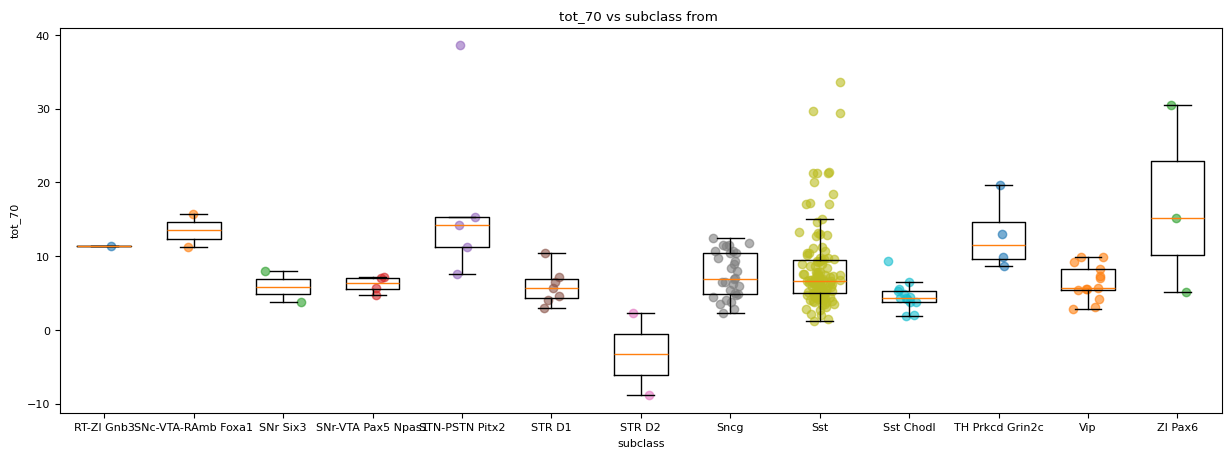

In [8]:
category = 'subclass'
value = 'tot_70' 

# Plotting tot_70 currents vs subclass
current_dict = dic_cat_val(df, category, value)
# subset_data is defined here to plot in a range (data would show 40 boxplots otherwise)
subset_data = dict(list(current_dict.items())[30:46])
boxplot_all_data(subset_data, category, value, width=15, height=5)

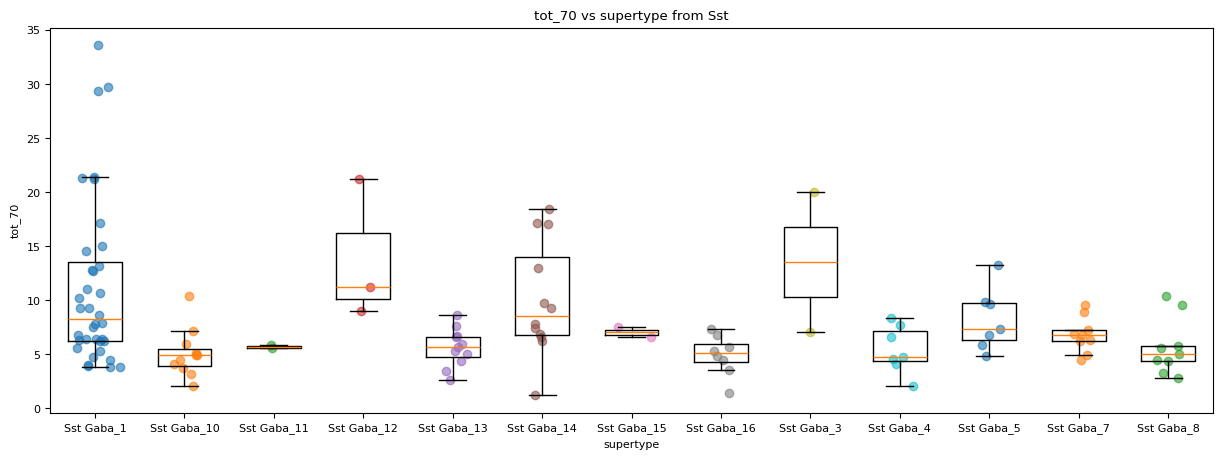

In [9]:
category = 'supertype'
value = 'tot_70'
filter = "Sst"
filter_cat = 'subclass'

# Plotting tot_70 currents vs supertype
df_sst = filter_category(df, filter, filter_cat)
current_dict_supertype = dic_cat_val(df_sst, category, value) 
boxplot_all_data(current_dict_supertype, category, value, filter, width=15, height=5)

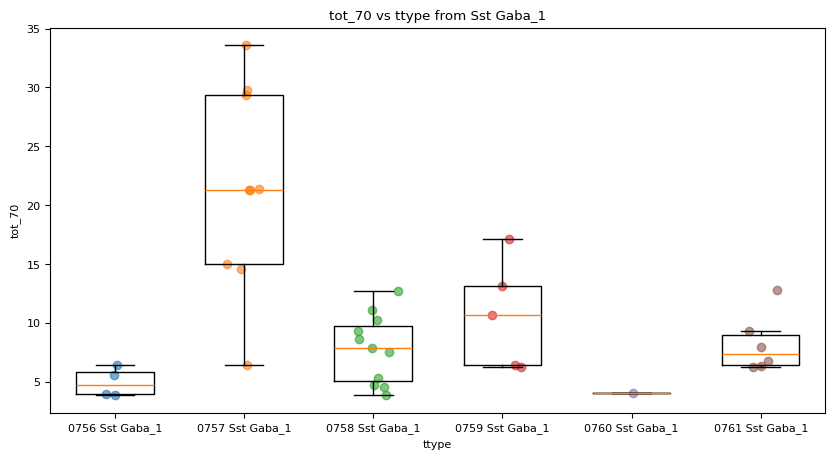

In [10]:
category = 'ttype'
value = 'tot_70'
filter = "Sst Gaba_1"
filter_cat = "supertype"

# Plotting tot_70 currents vs ttype
df_sst_Gaba_1 = filter_category(df, filter, filter_cat)
current_dict_ttype = dic_cat_val(df_sst_Gaba_1, category, value)
boxplot_all_data(current_dict_ttype, category, value, filter, width=10, height=5)

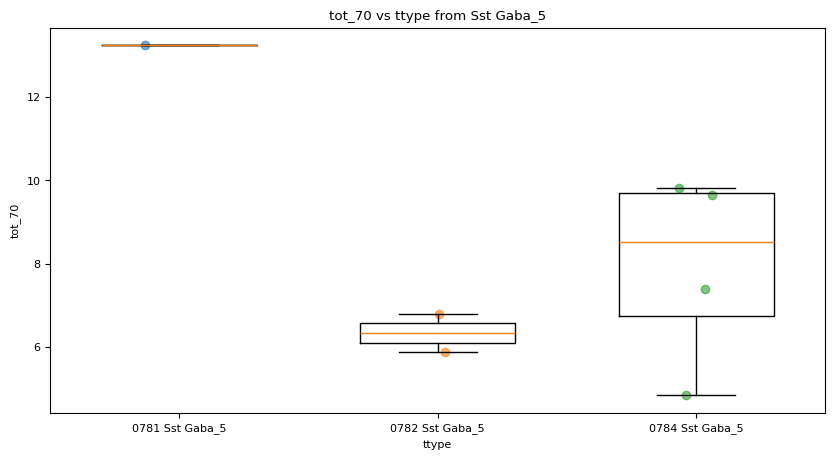

In [11]:
category = 'ttype'
value = 'tot_70'
filter = "Sst Gaba_5"
filter_cat = "supertype"

# Plotting tot_70 currents vs ttype
df_sst_Gaba_5 = filter_category(df, filter, filter_cat)
current_dict_ttype = dic_cat_val(df_sst_Gaba_5, category, value)
boxplot_all_data(current_dict_ttype, category, value, filter, width=10, height=5)

### Ratio slow - fast and transcriptomic type



In [12]:
# Df to be plotted
filter = None #Example 'Sst'

if filter == None:
    df_scatter = df
else:
    scatter_filter = subclass == filter
    df_scatter = df[scatter_filter]
    
currents_data = filter_nonmissing(df_scatter , 'fast_70')

In [13]:
def scatter_color(data, category, x, y, width=6, height=6, fontsize =8, savfig = False, markersize = 20, palette_dic = None, ncol = 1):
    """
    This function creates a scatter plot for x and y parameters, and colors each point according to the transcriptomical category selected.
    Colors can be changed by setting a dictionary as palette for each point. This can be created using the palette_dic() function.

    Args:
        data(dataframe): Contains the dataset from which the points will be plotted
        category(str): transcriptomical category to be used to color points ('subclass', 'supertype', 'ttype')
        x(str): parameter to bo plotted in the x axis
        y(str): parameter to be plotted in the y axis
        palette_dic(dictionary, optional): dictionary with type as key and color as values. Can be created from the palette_dic() function. Defaults to None.

    Retruns:
        Scatter plot
    """
    
    plt.rcParams.update({'font.size': fontsize})
    fig, ax = plt.subplots(figsize=(width, height))
    ax = sns.scatterplot(data=data, x=x, y=y, hue = category, palette = palette_dic, s=markersize)
    ax.set_xlabel(x)
    ax.set_ylabel(y)
    ax.set_title(f'{x} vs {y}')
    plt.gcf().set_facecolor('white')
    plt.tight_layout()
    # handles = subcategories para marcar solo las que no son grise, pero aun no funciona plt.legend(handles,...
    if savfig == True:
        plt.savefig(f"../results/scatter_{category}_{x}_{y}.png", dpi=300)
    plt.legend(title=category, loc='center left', bbox_to_anchor=(1, 0.5), ncol=ncol)

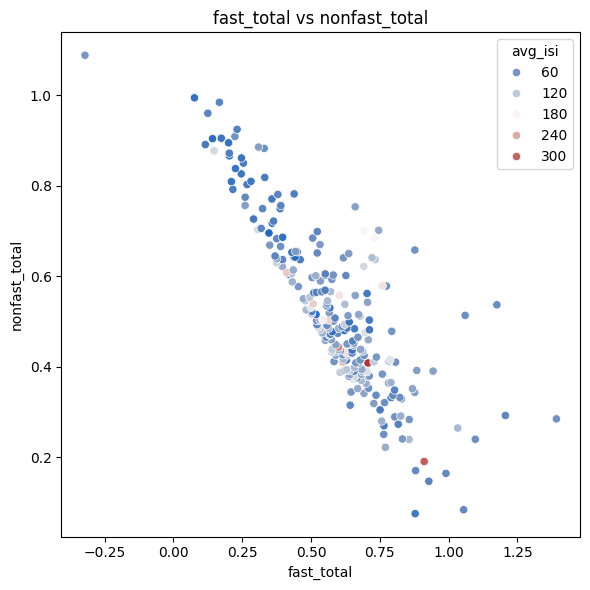

In [14]:
# Params ### euiro cambiar los colores al reves (TEMPORAL)
data = currents_data
category = 'avg_isi'
width=6
height=6
fontsize=10
x='fast_total'
y= 'nonfast_total'

plt.rcParams.update({'font.size': fontsize})
fig, ax = plt.subplots(figsize=(width, height))
ax = sns.scatterplot(data=data, x=x, y=y, hue = category, palette = "vlag")#, palette = palette_dic, s=markersize)
ax.set_xlabel(x)
ax.set_ylabel(y)
ax.set_title(f'{x} vs {y}')
plt.gcf().set_facecolor('white')
plt.tight_layout()

C:\Users\maria.vergara\AppData\Local\Temp\ipykernel_24448\2922481651.py:18: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(data=data, x=x, y=y, legend=False, c=data[category],palette='husl')


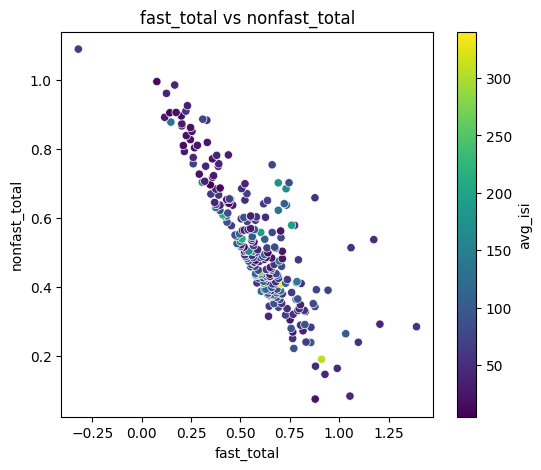

In [15]:
### euiro cambiar los colores al reves (TEMPORAL)

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Params
data = currents_data.dropna(subset=['avg_isi'])  # Drop rows with NaN values in 'avg_isi'
category = 'avg_isi'
width = 6
height = 5
fontsize = 10
x = 'fast_total'
y = 'nonfast_total'

plt.rcParams.update({'font.size': fontsize})
fig, ax = plt.subplots(figsize=(width, height))
sns.scatterplot(data=data, x=x, y=y, legend=False, c=data[category],palette='husl')
ax.set_xlabel(x)
ax.set_ylabel(y)
ax.set_title(f'{x} vs {y}')

# Create a continuous gradient legend
cbar = plt.colorbar(ax.collections[0], ax=ax)
cbar.set_label(category)

plt.show()



C:\Users\maria.vergara\AppData\Local\Temp\ipykernel_24448\1763510820.py:25: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(data=data, x=x, y=y, legend=False, c=data[category], palette='husl', hue_norm=norm)


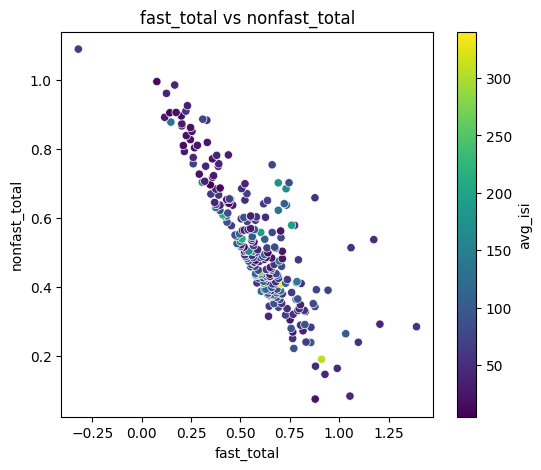

In [16]:
### euiro cambiar los colores al reves (TEMPORAL)


import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from matplotlib.colors import Normalize

# Params
data = currents_data.dropna(subset=['avg_isi'])  # Drop rows with NaN values in 'avg_isi'
category = 'avg_isi'
width = 6
height = 5
fontsize = 10
x = 'fast_total'
y = 'nonfast_total'

plt.rcParams.update({'font.size': fontsize})
fig, ax = plt.subplots(figsize=(width, height))

# Determine colormap range and normalize values
norm = Normalize(vmin=data[category].min(), vmax=data[category].max())

# Plot with specified palette
sns.scatterplot(data=data, x=x, y=y, legend=False, c=data[category], palette='husl', hue_norm=norm)
ax.set_xlabel(x)
ax.set_ylabel(y)
ax.set_title(f'{x} vs {y}')

# Create a continuous gradient legend
cbar = plt.colorbar(ax.collections[0], ax=ax)
cbar.set_label(category)

plt.show()

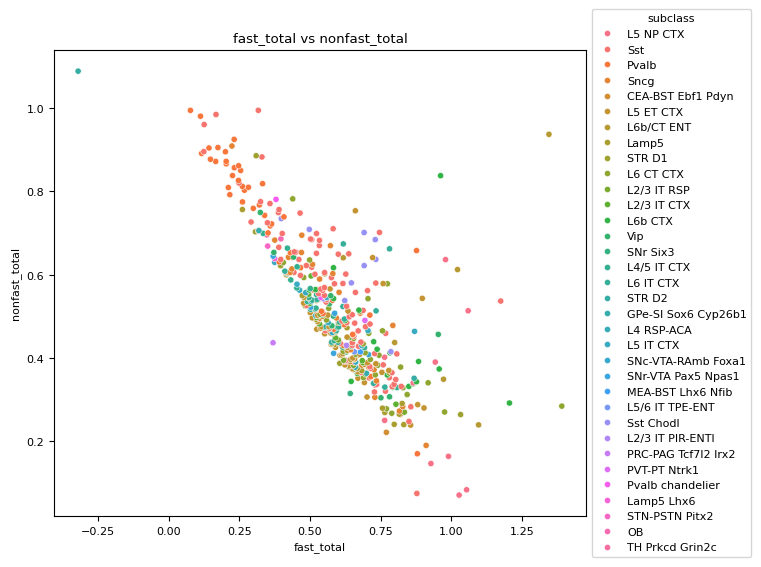

In [17]:
scatter_color(currents_data, 'subclass', 'fast_total', 'nonfast_total', savfig=True)

C:\Users\maria.vergara\AppData\Local\Temp\ipykernel_24448\1211520927.py:24: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


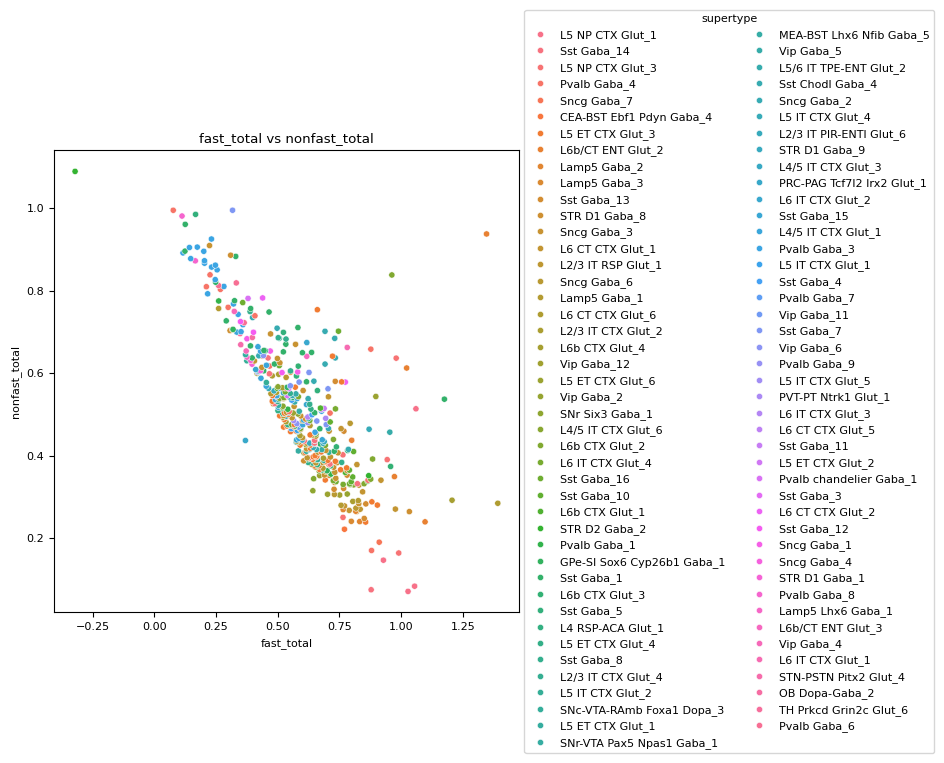

In [18]:
scatter_color(currents_data, 'supertype', 'fast_total', 'nonfast_total', savfig=True, ncol=2)

C:\Users\maria.vergara\AppData\Local\Temp\ipykernel_24448\1211520927.py:24: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


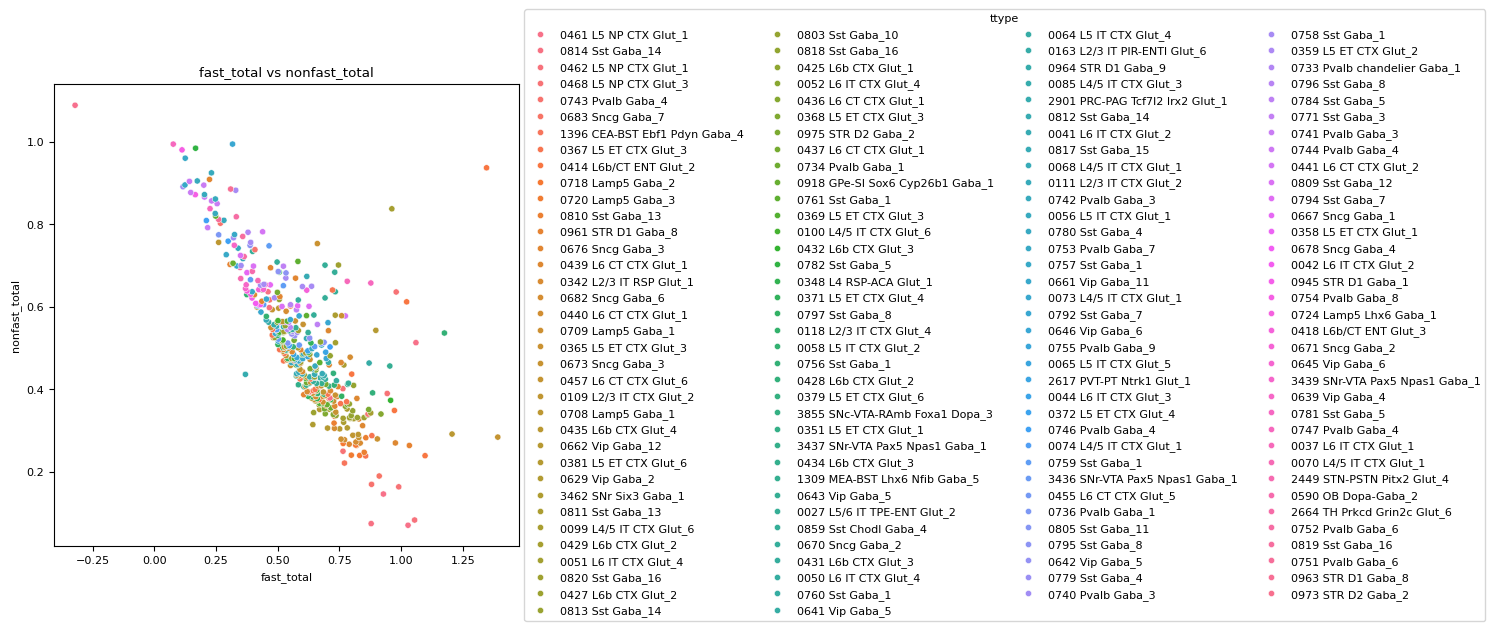

In [19]:
scatter_color(currents_data, 'ttype', 'fast_total', 'nonfast_total', savfig=True, ncol=4)

### Highlight one type

### Functions

In [30]:
def palette_dic(data, category, subcategories = None, colors = None): 
    """_summary_

    Args:
        category: parameter or column to choose 
        subcategories (list, optional): List of values to highlight. Defaults to None.
        colors (list, optional): List of colors to use. Defaults to None.
        
    Example:
        palette_dic = palette_dic(category, subcategories=['L5 IT CTX', 'STR D1', 'Lamp5', 'Sst'])
        palette_dic = palette_dic(data, 'Result pass/fail BA', subcategories=['Fail', 'Pass'], colors= ['r', 'g'] )
    """
    
    palette_d = {}
    if subcategories is None and colors is None:
        palette_d = None
        return palette_d
    
    else:
        #si es none usar todos los colores sin subrayar ninguno en especifico, si hay algun valor, subrayar solo esos de la lista
        palette_d =  {x: 'lightgray' for x in data[category].unique()} #sets all colors to gray
        
        if colors is None:
            colors = sns.color_palette('hls', len(subcategories))
        
        n=0
        for subcategory in subcategories:
            palette_d[subcategory] = colors[n]
            n = n + 1
        return palette_d
    

In [21]:
def color_per_cat_types(df_cat, subtype):
    return df_cat[subtype].unique() #returns array with values

df_sst_Gaba_1['ttype'].unique()
color_per_cat_types

<function __main__.color_per_cat_types(df_cat, subtype)>

In [22]:
# Params
data = currents_data
category = 'subclass'

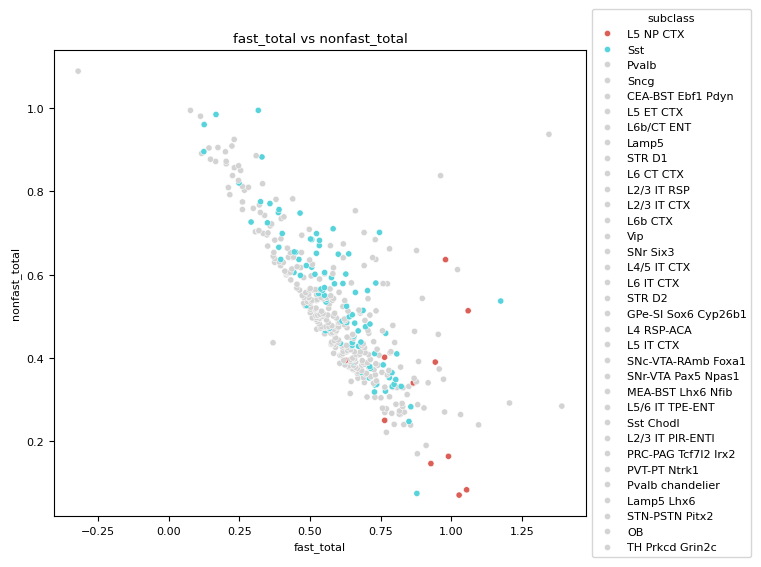

In [23]:
category = 'subclass'
subcategories = ['L5 NP CTX', 'Sst']

palette_dict = palette_dic(data, category, subcategories) #colors = ['orange','teal']) #, 'STR D1', 'Lamp5', 'Sst'
scatter_color(data, 'subclass', 'fast_total', 'nonfast_total', savfig=True, palette_dic=palette_dict)

C:\Users\maria.vergara\AppData\Local\Temp\ipykernel_24448\1211520927.py:24: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


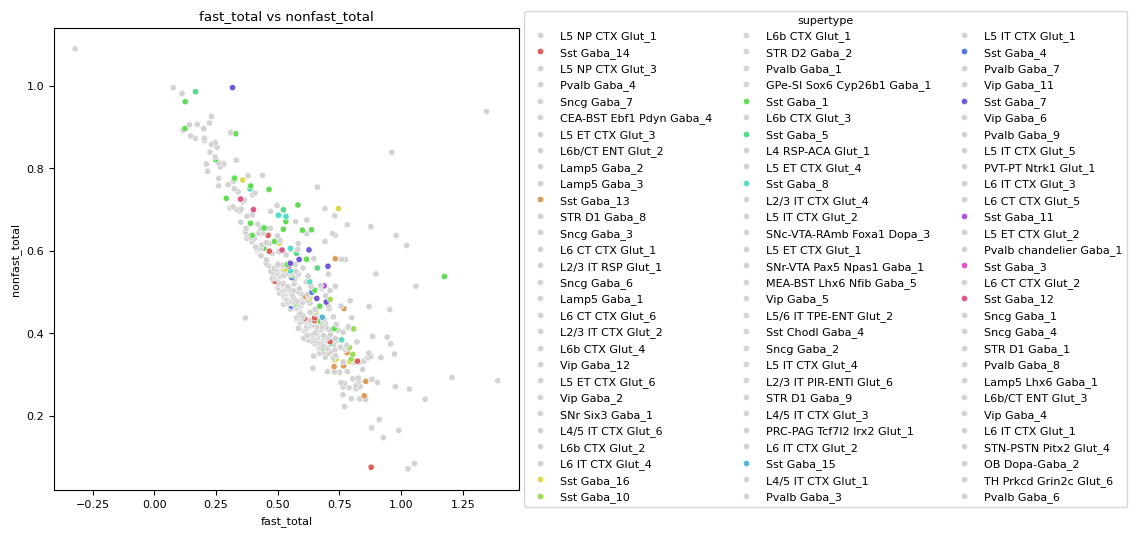

In [24]:
filter_by = 'Sst'
filter_cat='subclass'
category = 'supertype'

category_df = filter_category(data, filter_by, filter_cat)
subcategories = category_df[category].unique()
palette_dict = palette_dic(data, category, subcategories=subcategories)
scatter_color(data, category, 'fast_total', 'nonfast_total', savfig=True, palette_dic=palette_dict, ncol=3)

C:\Users\maria.vergara\AppData\Local\Temp\ipykernel_24448\1211520927.py:24: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


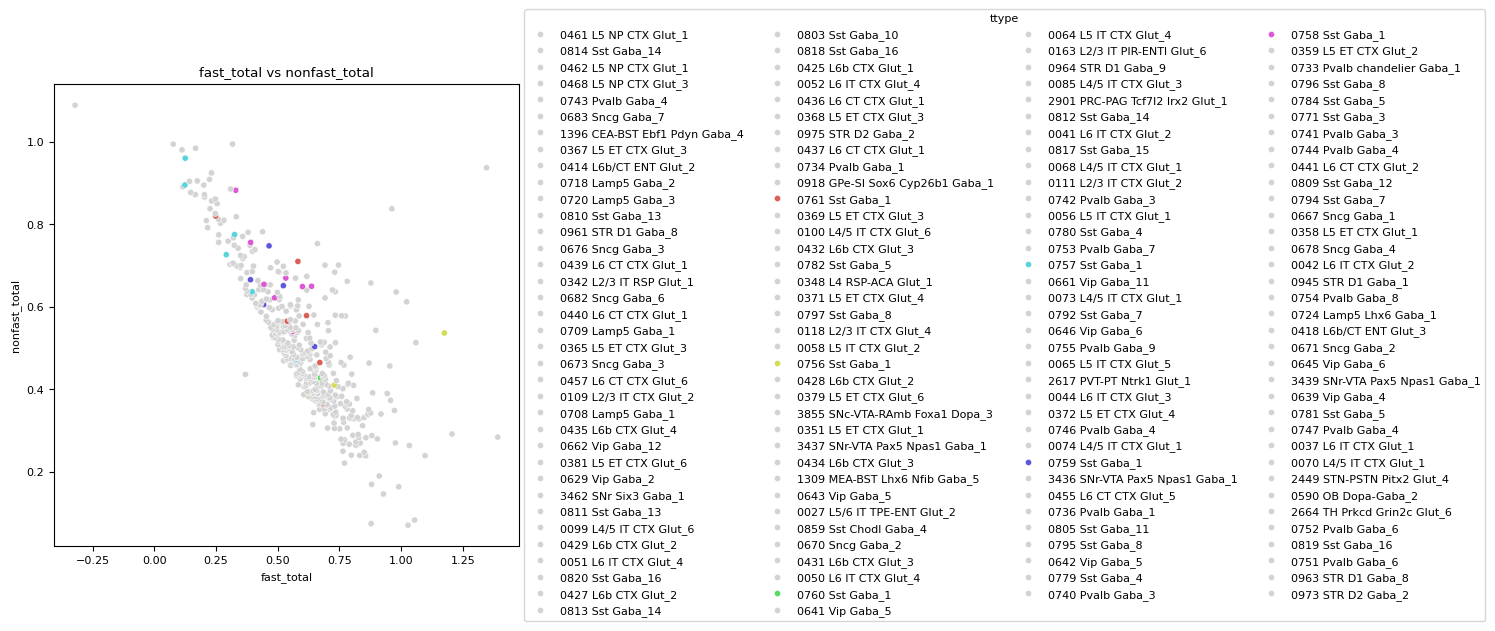

In [25]:
filter_by = 'Sst Gaba_1'
filter_cat='supertype'
category = 'ttype'

category_df = filter_category(data, filter_by, filter_cat)
subcategories = category_df[category].unique()

palette_dict = palette_dic(data, category, subcategories=subcategories)
scatter_color(data, category, 'fast_total', 'nonfast_total', savfig=True, palette_dic=palette_dict, ncol=4)